In [7]:
def extract_sales_from_pdf(pdfname):
    from pdfminer.high_level import extract_text
    import re
    text = extract_text(pdfname)
    lines = []
    line=[]
    for word in text:
        line.append(word)# if "665" in line:
        # print(word)
        if word == "\n":
            line = ''.join(line)
            # print(line)
            lines.append(line)
            line = []
    # print(lines)
    year = int(pdfname[-11:-7])
    month = int(pdfname[-6:-4])
    if year*100+month == 202012: 
        for line in lines:
            if 'スーパードライ' in line:
                # print(line)
                sales = re.sub(r'スーパードライ','',line)
                sales = re.sub(r'\n','',sales)
                sales = int(sales) 
                # print(sales)
                break
    else:
        for index, line in enumerate(lines):
            if '万箱' in line:
                break
        if year*100+month == 202104 or year*100+month >= 202110:
            sales = int(lines[index+2].replace(",",""))
        else:
            sales = int(lines[index+1].replace(",",""))
    return sales

def extract_sales_from_html(htmlname):
    import requests
    from bs4 import BeautifulSoup
    import re
    soup = BeautifulSoup(open(htmlname, encoding="shift_jisx0213"),'lxml')
    text = soup.get_text()
    lines = []
    line=[]
    for word in text:
        line.append(word)# if "665" in line:
        # print(word)
        if word == "\n":
            line = ''.join(line)
            # print(line)
            lines.append(line)
            line = []
    # print(lines)
    # index = lines.index("スーパードライ")
    for index, line in enumerate(lines):
        if 'スーパードライ' in line:
            break
    sales = int(lines[index+1].replace(",",""))
    return sales

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("data_tokyo_temperature.csv",
                names=["month","temperature","品質情報","均質番号"],index_col=0,parse_dates=["month"])
# df["month"] = pd.to_datetime(df["month"])
print(df)

            temperature  品質情報  均質番号
month                              
2012-01-01          4.8     8     1
2012-02-01          5.4     8     1
2012-03-01          8.8     8     1
2012-04-01         14.5     8     1
2012-05-01         19.6     8     1
...                 ...   ...   ...
2021-08-01         27.4     8     2
2021-09-01         22.3     8     2
2021-10-01         18.2     8     2
2021-11-01         13.7     8     2
2021-12-01          7.9     8     2

[120 rows x 3 columns]


In [9]:
log = []
for year in range(2012,2020):
    for month in range(1,13):
        htmlname = "./data_html/{:4d}_{:02d}.html".format(year,month)
        sales = extract_sales_from_html(htmlname)
        # print(year,month,sales)
        log.append([year,month,sales])

for year in range(2020,2022):
    for month in range(1,13):
        if year == 2020 and month == 11:
            sales = 560 # なぜか2020年11月のPDFファイルだけ開けなかったので手入力。
            # print(year,month,sales)
            log.append([year,month,sales])
            continue
        pdfname = "./data_pdf/{:4d}_{:02d}.pdf".format(year,month)
        sales = extract_sales_from_pdf(pdfname)
        # print(year,month,sales)
        log.append([year,month,sales])
log = np.array(log)
df['beer'] = log[:,2]
print(df)
df.to_csv("df.csv")

            temperature  品質情報  均質番号  beer
month                                    
2012-01-01          4.8     8     1   480
2012-02-01          5.4     8     1   610
2012-03-01          8.8     8     1   810
2012-04-01         14.5     8     1   886
2012-05-01         19.6     8     1   847
...                 ...   ...   ...   ...
2021-08-01         27.4     8     2   455
2021-09-01         22.3     8     2   385
2021-10-01         18.2     8     2   529
2021-11-01         13.7     8     2   573
2021-12-01          7.9     8     2   925

[120 rows x 4 columns]


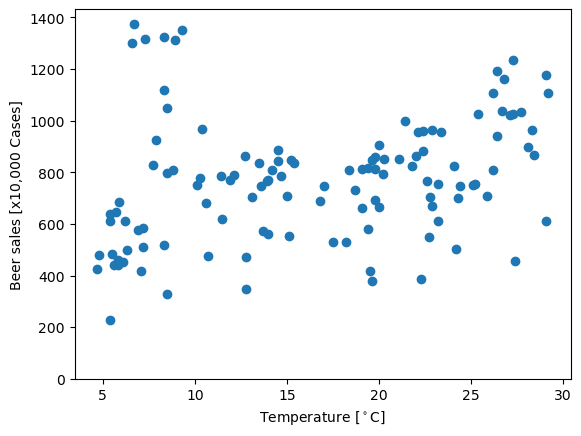

In [10]:
plt.scatter(df.temperature,df.beer)
plt.xlabel(r"Temperature [$^\circ$C]")
plt.ylabel(r"Beer sales [x10,000 Cases]")
plt.ylim(0,None)
plt.show()

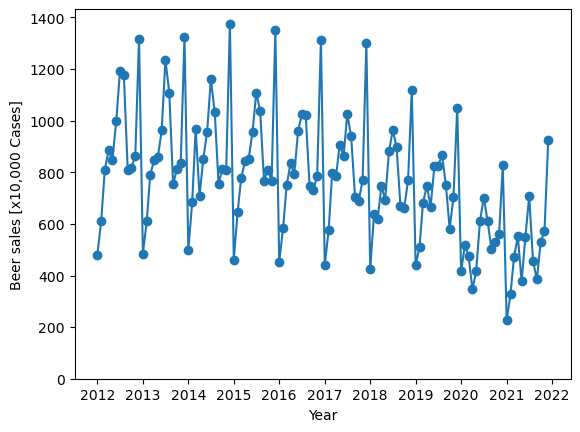

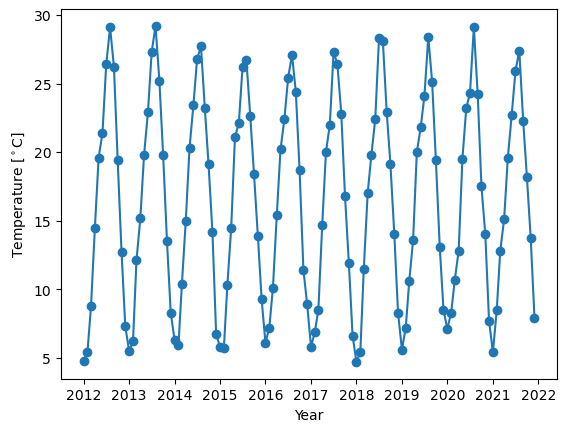

In [11]:
plt.plot_date(df.index,df.beer,"o-")
plt.xlabel(r"Year")
plt.ylabel(r"Beer sales [x10,000 Cases]")
plt.ylim(0,None)
plt.show()
plt.plot_date(df.index,df.temperature,"o-")
plt.xlabel(r"Year")
plt.ylabel(r"Temperature [$^\circ$C]")
plt.show()

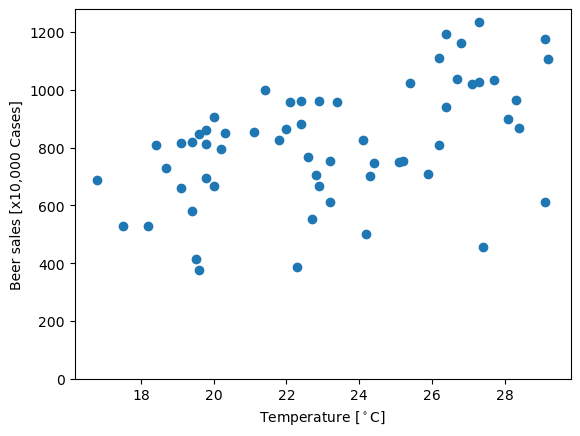

In [12]:
from datetime import datetime
df_summer = df[df.index.month > 4]
df_summer = df_summer[df_summer.index.month < 11]
# print(df_summer)
plt.scatter(df_summer.temperature,df_summer.beer)
plt.xlabel(r"Temperature [$^\circ$C]")
plt.ylabel(r"Beer sales [x10,000 Cases]")
plt.ylim(0,None)
plt.show()